# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
%matplotlib inline

In [3]:
alpha = .95

In [4]:
data = load_iris()
x, y = data['data'], data['target']

In [68]:
data = load_digits()
x, y = data.data, data.target

In [5]:
# 1
mu = np.zeros(x.shape[1])
for i in range(x.shape[1]):
    mu[i] = np.mean(x[:,i])

# 2
Z = x - (1 * np.transpose(mu))

# 3
K = np.dot(np.transpose(Z), Z) / x.shape[0]

# 4, 5
eigenvalues, U = np.linalg.eig(K)

# 6
def f(r):
    numerator = 0
    denominator = eigenvalues.sum()
    for i in range(r):
        numerator += eigenvalues[i]
    return numerator / denominator

# 7
for r in range(1, eigenvalues.shape[0]+1):
    if f(r) >= alpha:
        naimenshiy_r = r
        break

# 8
eigenvectors = U.copy()
U = U[:,:r]

# 9
U = np.transpose(U)
A = np.array([[np.dot(U[ri], x_i) for ri in range(r)] for x_i in Z])

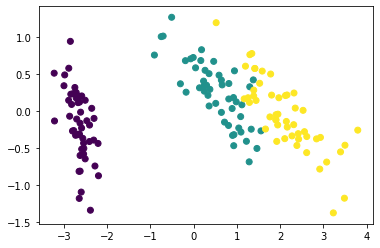

In [6]:
plt.scatter(A[:,0], A[:,1], c=y)

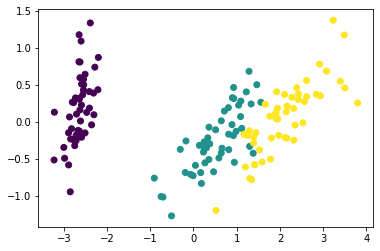

In [148]:
plt.scatter(x_trans[:,0], x_trans[:,1], c=y)

ValueError: cannot reshape array of size 29 into shape (8,8)

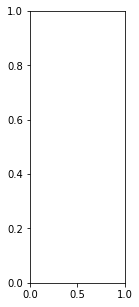

In [67]:
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(A[i].reshape((8,8)))

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
x_trans = pca.fit_transform(x)
vectors = pca.components_
values = pca.explained_variance_

In [41]:
"моё", eigenvalues[:2], eigenvectors[:,:2].transpose(), "украденное", values, vectors

('моё',
 array([4.20005343, 0.24105294]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [-0.65658877, -0.73016143,  0.17337266,  0.07548102]]),
 'украденное',
 array([4.22824171, 0.24267075]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]))

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

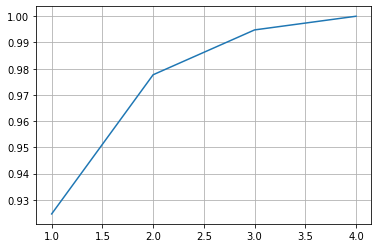

In [46]:
var_per = np.array([f(r) for r in range(1, eigenvalues.shape[0]+1)])
plt.plot(np.arange(1, 5), var_per)
plt.grid()

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [56]:
r = []
for k in range(A.shape[1]):
    xkhat = A[:,k].mean()
    for j in range(x.shape[1]):
        xjhat = x[:,j].mean()
        nsum = 0
        dlsum = 0
        drsum = 0
        for i in range(x.shape[0]):
            nsum += (x[i,j] - xjhat) * (A[i,k] - xkhat)
            dlsum += (x[i,j] - xjhat)**2
            drsum += (A[i,k] - xkhat)**2
        r.append(("Признак", j, "Компонента", k, "r_jk", nsum/((dlsum*drsum)**.5)))

In [57]:
r

[('Признак', 0, 'Компонента', 0, 'r_jk', 0.8974017619582983),
 ('Признак', 1, 'Компонента', 0, 'r_jk', -0.39874847245570016),
 ('Признак', 2, 'Компонента', 0, 'r_jk', 0.9978739422413107),
 ('Признак', 3, 'Компонента', 0, 'r_jk', 0.966547516703307),
 ('Признак', 0, 'Компонента', 1, 'r_jk', -0.39060441288849135),
 ('Признак', 1, 'Компонента', 1, 'r_jk', -0.8252287092319991),
 ('Признак', 2, 'Компонента', 1, 'r_jk', 0.04838059968989315),
 ('Признак', 3, 'Компонента', 1, 'r_jk', 0.04878160292939677)]